# Coffee chain sales - Logistic Regression


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
#Filepath of the dataframe
fp = "Coffee_Chain_Sales.csv"
#Reading dataframe
df = pd.read_csv(fp)

df.head()

x.head()

,Cogs,Sales,Total_expenses,Profit
0,51,122,76,-5
1,52,123,45,26
2,43,107,36,28
3,38,94,21,35
4,72,182,54,56


In [6]:
# Codifiying the difference 
df['Diff'] = np.where(df['DifferenceBetweenActualandTargetProfit'] > 0, 0, 1)


In [7]:
#Extract central market with desired attributed
df_central = df[['Target_profit','Diff','Marketing','Product','Target_sales ']].loc[df['Market'] == 'Central']
#Converting product to dummy variables
df_central = pd.get_dummies(df_central, columns=['Product'], drop_first=True)
#Selecting Diff column to be used as target variable
df_central_y = df_central['Diff']
#Define X dataset
df_central_x = df_central.drop('Diff', axis=1)
df_central_x.head()

,Target_profit,Marketing,Target_sales,Product_Caffe Mocha,Product_Chamomile,Product_Colombian,Product_Darjeeling,Product_Decaf Espresso,Product_Decaf Irish Cream,Product_Earl Grey,Product_Green Tea,Product_Lemon,Product_Mint
0,30,46,90,0,0,0,0,0,0,0,0,1,0
1,50,17,90,0,0,0,0,0,0,0,0,0,1
5,60,0,60,0,0,0,0,1,0,0,0,0,0
16,30,41,80,0,1,0,0,0,0,0,0,0,0
17,60,13,90,0,0,0,0,0,0,0,0,1,0


In [8]:

from sklearn.linear_model import LogisticRegression

# Function for logistic regression defining market and product
def log_coffee_market(df,market,product):
    #Extract central market with desired attributed
    df_market = df[['Diff','Marketing','Target_profit','Target_sales ']].loc[(df['Market'] == market) & (df['Product'] == product)]
    #Converting product to dummy variables
    #df_central = pd.get_dummies(df_central, columns=['Product'], drop_first=True)
    #Selecting Diff column to be used as target variable
    df_market_y = df_market['Diff']
    #Define X dataset
    df_market_x = df_market.drop('Diff', axis=1)
    # Creating a logistic regresion model using previously defined x and y 
    model = LogisticRegression(solver='liblinear', random_state=0).fit(df_market_x,df_market_y)
    return df_market_x, df_market_y, model



In [9]:
x_central, y_central, model_central = log_coffee_market(df,'Central', 'Colombian')
x = model_central.predict(x_central)

Market_min = x_central['Marketing'].min()
Market_max = x_central['Marketing'].max()
Marketing_array = np.arange(Market_min, 40, 1)

# Creating a predicted df to explore the sigmoid in marketing, leaving other attributes fixed to the mean value
df_sig = pd.DataFrame()
df_sig['Marketing'] = Marketing_array
df_sig['Target_profit'] = x_central['Target_profit'].mean()
df_sig['Target_sales '] =  x_central['Target_sales '].mean()


In [10]:
# predicted values - binary 
sig_pred = model_central.predict(df_sig)
# predicting the probabilities - sigmoid
probabilities = model_central.predict_proba(df_sig)

Text(0, 0.5, 'Probability')

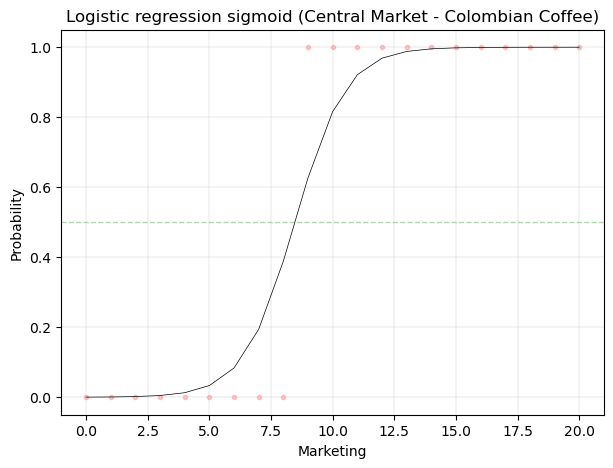

In [16]:
import matplotlib.pyplot as plt

#Plotting the sigmoid exploring marketing space
plt.scatter(df_sig['Marketing'], sig_pred,marker='.', alpha=0.2, color='red')
#plt.scatter(x_central['Marketing'],y_central,marker='.', color = 'blue', alpha=0.2)
plt.plot(df_sig['Marketing'], probabilities[:, 1], color="black", linewidth=0.5)
plt.axhline(y=0.5, color='green',alpha = 0.3, linestyle='--', linewidth=1)
plt.grid(linewidth = 0.2)
plt.title("Logistic regression sigmoid (Central Market - Colombian Coffee)")
plt.xlabel("Marketing")
plt.ylabel("Probability")

Text(0, 0.5, 'Probability')

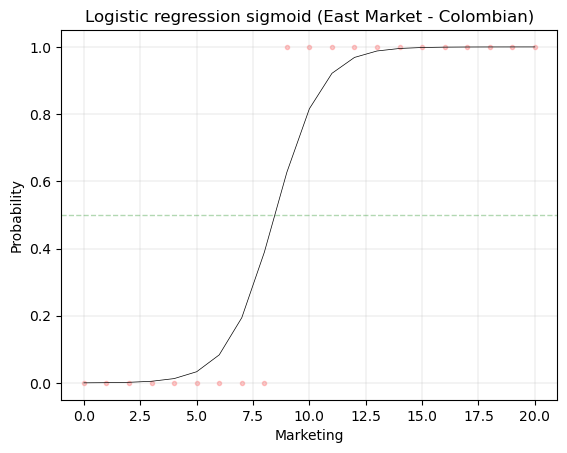

In [12]:

x_central, y_central, model_central = log_coffee_market(df,'East', 'Green Tea')

Market_min = x_central['Marketing'].min()
Market_max = x_central['Marketing'].max()
Marketing_array = np.arange(Market_min, Market_max, 1)

#df_market = df[['Diff','Marketing','Target_profit','Target_sales ','Total_expenses','Sales']].loc[(df['Market'] == market) & (df['Product'] == product)]
df_sig = pd.DataFrame()
df_sig['Marketing'] = Marketing_array
df_sig['Target_profit'] = x_central['Target_profit'].mean()
df_sig['Target_sales '] =  x_central['Target_sales '].mean()




sig_pred = model_central.predict(df_sig)
probabilities = model_central.predict_proba(df_sig)

import matplotlib.pyplot as plt

plt.scatter(df_sig['Marketing'], sig_pred,marker='.', alpha=0.2, color='red')
#plt.scatter(x_central['Marketing'],y_central,marker='.', color = 'blue', alpha=0.2)
plt.plot(df_sig['Marketing'], probabilities[:, 1], color="black", linewidth=0.5)
plt.axhline(y=0.5, color='green',alpha = 0.3, linestyle='--', linewidth=1)
plt.grid(linewidth = 0.2)
plt.title("Logistic regression sigmoid (East Market - Colombian)")
plt.xlabel("Marketing")
plt.ylabel("Probability")


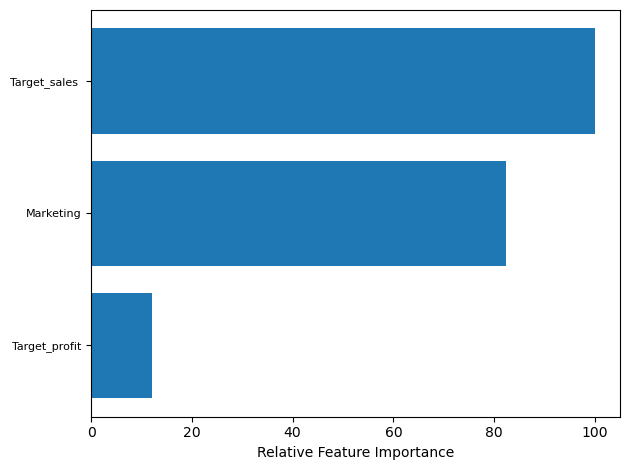

In [13]:
 # Checking relative feature importance in the model.

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X, y, model_central = log_coffee_market(df,'Central', 'Colombian')

#Scale your data
scaler = StandardScaler()
scaler.fit(X) 
X_scaled = pd.DataFrame(scaler.transform(X),columns = X.columns)

clf = LogisticRegression(random_state = 0)
clf.fit(X_scaled, y)

feature_importance = abs(clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

Text(0.5, 1.0, 'Scatterplot Marketing vs Profit')

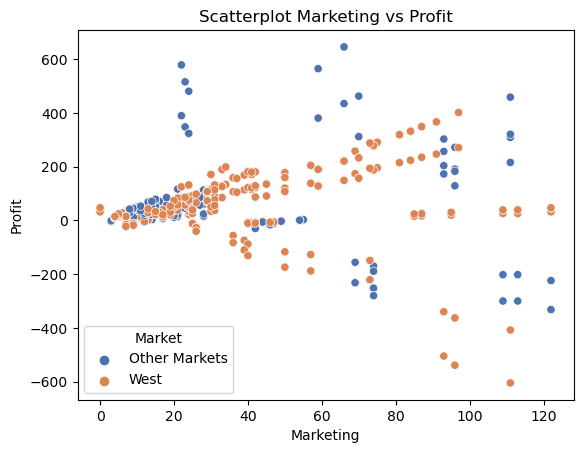

In [14]:
import seaborn as sns
x = df.loc[(df['Market']=='Central')].groupby(['Product'])['Profit'].sum()


df_1 = df# & (df['Product']=='Green Tea')]
df_1['Market'] = np.where(df['Market'] != 'West', 'Other Markets', 'West')

sns.scatterplot(x=df_1['Marketing'],y=df_1['Profit'], hue = df_1['Market'], palette="deep")
plt.title("Scatterplot Marketing vs Profit")

<Axes: xlabel='Market', ylabel='Profit'>

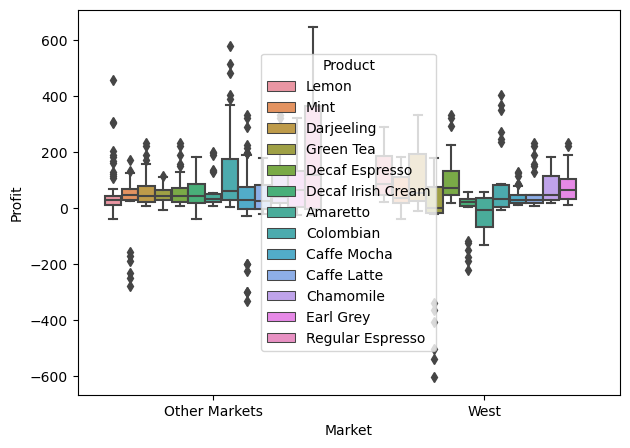

In [15]:
from matplotlib import rcParams

rcParams['figure.figsize'] =7,5
sns.boxplot(data = df, x="Market", y = "Profit", hue="Product")